In [2]:
%matplotlib inline 
import pandas
import geopandas

In [9]:
import time
import fiona
import numpy
from shapely.geometry import Point, LineString, Polygon
from convertbng.util import convert_bng, convert_lonlat

In [3]:
railways = geopandas.GeoDataFrame.from_file('./data/osm_railway.shp')

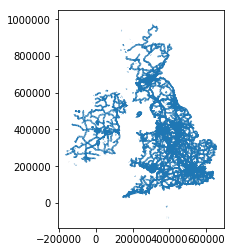

In [9]:
railways.plot()

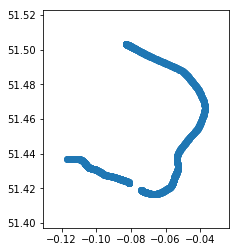

In [5]:
route_file_path = './data/track_2018-03-14_134847.gpx'
train_route = geopandas.read_file(route_file_path, layer='track_points')
train_route.plot()

In [7]:
def create_bounding_polygon(bbox):
    
    p1 = Point(bbox[0], bbox[3])
    p2 = Point(bbox[2], bbox[3])
    p3 = Point(bbox[2], bbox[1])
    p4 = Point(bbox[0], bbox[1])

    np1 = (p1.coords.xy[0][0], p1.coords.xy[1][0])
    np2 = (p2.coords.xy[0][0], p2.coords.xy[1][0])
    np3 = (p3.coords.xy[0][0], p3.coords.xy[1][0])
    np4 = (p4.coords.xy[0][0], p4.coords.xy[1][0])

    return Polygon([np1, np2, np3, np4])

In [6]:
list(railways.geometry[0].coords)
railways.size

7648305

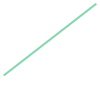

In [4]:
def convert_linestring(linestring):
    [eastings, northings] = list(numpy.array(linestring.coords).transpose())
    return LineString(numpy.array(convert_lonlat(eastings, northings)).transpose())
    
type(railways.geometry[0])
convert_linestring(railways.geometry[0])

In [8]:
# linestring = list(railways.iloc[[47864]].loc[:,['geometry']].items())[0][1].values[0]
# [eastings, northings] = list(numpy.array(linestring.coords).transpose())
# [eastings, northings]
# convert_lonlat(eastings[:2], northings[:2])
railways_filter = railways.geometry.apply(lambda linestring: all([(x > 0 and y > 0) for (x, y) in linestring.coords]))
filtered_railways = railways[railways_filter]
( railways.size, filtered_railways.size )

(7648305, 7497540)

In [10]:
sample = 1000
railways_geometry = [convert_linestring(linestring) for linestring in filtered_railways.geometry.tail(sample)]
lat_lng_railways = geopandas.GeoDataFrame(filtered_railways.copy().tail(sample), geometry=railways_geometry)
lat_lng_railways.to_pickle('./data/lat_lng_railways_sample.pkl')

In [11]:
lat_lng_railways = filtered_railways.geometry.apply(convert_linestring)
lat_lng_railways.to_pickle('./data/lat_lng_railways.pkl')
lat_lng_railways.head()

0    LINESTRING (-1.42565248 53.40908579, -1.425330...
1    LINESTRING (-1.42565248 53.40908579, -1.425089...
2    LINESTRING (-1.42563771 53.12115437, -1.425588...
3    LINESTRING (-1.42558882 53.12104375, -1.425133...
4    LINESTRING (-1.42558011 53.12116354, -1.425527...
Name: geometry, dtype: object

In [ ]:
bounding_polygon = create_bounding_polygon(train_route.total_bounds)
lat_lng_intersections = lat_lng_railways.geometry.intersects(bounding_polygon)
lat_lng_intersections.sum()
# train_route[train_route.geometry.crosses(bounding_dataframe)]

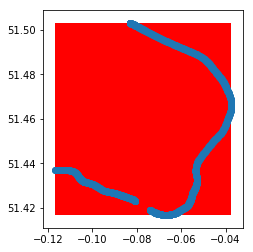

In [84]:
axis = bounding_dataframe.plot(color='red')
train_route.plot(ax=axis)

In [3]:
railways_pickle_path = './data/lat_lng_railways.pkl'
railways = geopandas.GeoDataFrame(pandas.read_pickle(railways_pickle_path))

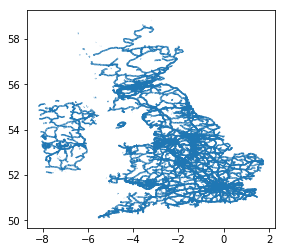

In [4]:
railways.plot()

In [31]:
bounding_polygon = create_bounding_polygon(train_route.total_bounds)
# railways.count() => 108660
valid_entries = 40660
intersection = railways.geometry.head(valid_entries).intersects(bounding_polygon)
filtered_railways = railways.head(valid_entries)[intersection]

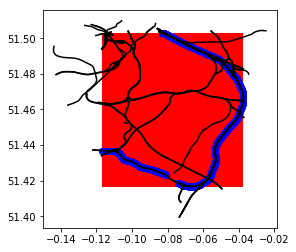

In [32]:
bounding_dataframe = geopandas.GeoSeries(bounding_polygon)
axis = bounding_dataframe.plot(color='red')
filtered_railways.plot(color='black', ax=axis)
train_route.plot(color='blue', ax=axis)

In [33]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}